In [1]:
import  pandas as pd

In [2]:
df=pd.read_csv('customer_segmentation.csv')
df.head()

,customer_id,total_orders,avg_order_value,purchase_frequency,num_categories_bought,avg_review_score,customer_state
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,1.0,1.0,1.0,SP
1,000161a058600d5901f007fab4c27140,1,67.41,1.0,1.0,4.0,MG
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,1.0,1.0,5.0,ES
3,0002414f95344307404f0ace7a26f1d5,1,179.35,1.0,1.0,5.0,MG
4,000379cdec625522490c315e70c7a9fb,1,107.01,1.0,1.0,4.0,SP


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            99441 non-null  object 
 1   total_orders           99441 non-null  int64  
 2   avg_order_value        99441 non-null  float64
 3   purchase_frequency     99441 non-null  float64
 4   num_categories_bought  99441 non-null  float64
 5   avg_review_score       99441 non-null  float64
 6   customer_state         99441 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.3+ MB


In [4]:
df2=df.drop(columns=['customer_id'])
df2

,total_orders,avg_order_value,purchase_frequency,num_categories_bought,avg_review_score,customer_state
0,1,114.74,1.0,1.0,1.0,SP
1,1,67.41,1.0,1.0,4.0,MG
2,1,195.42,1.0,1.0,5.0,ES
3,1,179.35,1.0,1.0,5.0,MG
4,1,107.01,1.0,1.0,4.0,SP
...,...,...,...,...,...,...
99436,1,81.36,1.0,1.0,3.0,RS
99437,1,63.13,1.0,1.0,4.0,RJ
99438,1,214.13,1.0,1.0,5.0,SP
99439,1,45.50,1.0,1.0,5.0,MG


In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df2['customer_state']=labelencoder.fit_transform(df2['customer_state'])
df2.head()

,total_orders,avg_order_value,purchase_frequency,num_categories_bought,avg_review_score,customer_state
0,1,114.74,1.0,1.0,1.0,25
1,1,67.41,1.0,1.0,4.0,10
2,1,195.42,1.0,1.0,5.0,7
3,1,179.35,1.0,1.0,5.0,10
4,1,107.01,1.0,1.0,4.0,25


In [6]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler=MinMaxScaler()
df2=pd.DataFrame(minmaxscaler.fit_transform(df2),columns=df2.columns)
df2.head().round(2)

,total_orders,avg_order_value,purchase_frequency,num_categories_bought,avg_review_score,customer_state
0,0.0,0.01,0.0,0.0,0.2,0.96
1,0.0,0.00,0.0,0.0,0.8,0.38
2,0.0,0.01,0.0,0.0,1.0,0.27
3,0.0,0.01,0.0,0.0,1.0,0.38
4,0.0,0.01,0.0,0.0,0.8,0.96


In [7]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(df2)
df2['clusters'] = kmeans.labels_
df2.head()

,total_orders,avg_order_value,purchase_frequency,num_categories_bought,avg_review_score,customer_state,clusters
0,0.0,0.008397,0.0,0.0,0.2,0.961538,2
1,0.0,0.004933,0.0,0.0,0.8,0.384615,0
2,0.0,0.014302,0.0,0.0,1.0,0.269231,0
3,0.0,0.013126,0.0,0.0,1.0,0.384615,0
4,0.0,0.007831,0.0,0.0,0.8,0.961538,1


In [8]:
inertia=kmeans.inertia_
inertia

4171.432011901723

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1388\1097102932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='clusters', data=df2, palette='Set2')


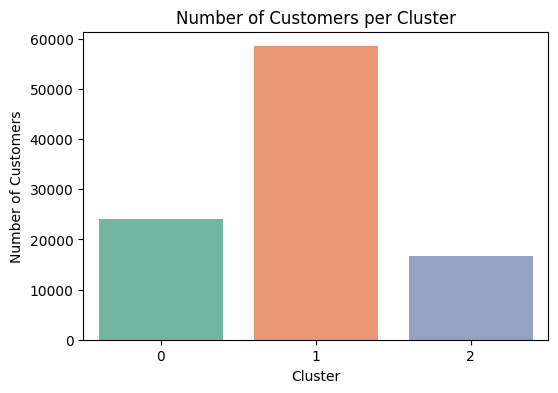

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='clusters', data=df2, palette='Set2')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1388\932283764.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='clusters', y='revenue', data=revenue_per_cluster, palette='Set2')


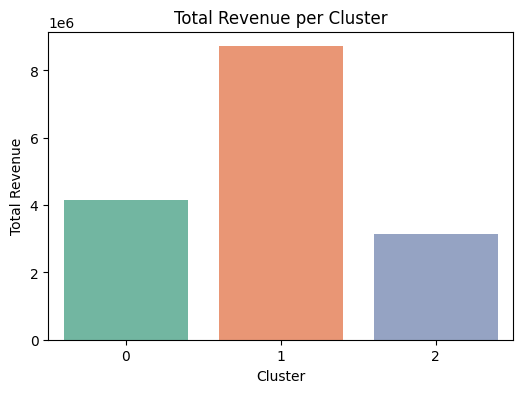

In [11]:
# Calculate total revenue per cluster
df['clusters'] = df2['clusters']
df['revenue'] = df['total_orders'] * df['avg_order_value']
revenue_per_cluster = df.groupby('clusters')['revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='clusters', y='revenue', data=revenue_per_cluster, palette='Set2')
plt.title('Total Revenue per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Revenue')
plt.show()

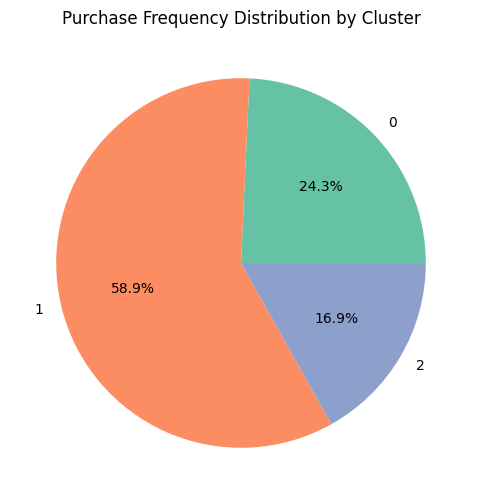

In [12]:
# Calculate total purchase frequency per cluster
purchase_freq_per_cluster = df.groupby('clusters')['purchase_frequency'].sum()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(purchase_freq_per_cluster, labels=purchase_freq_per_cluster.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Purchase Frequency Distribution by Cluster')
plt.show()

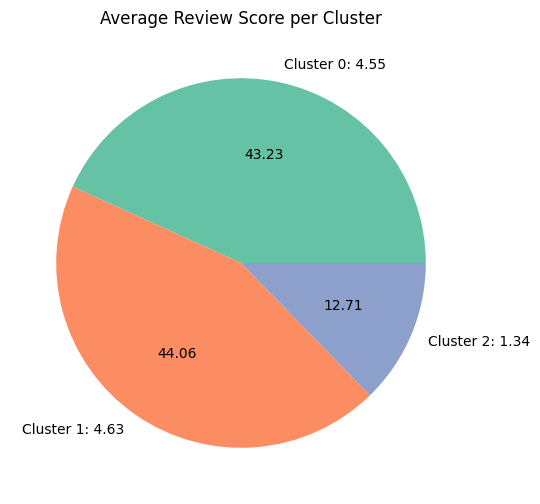

In [13]:
# Calculate average review score per cluster
avg_review_per_cluster = df.groupby('clusters')['avg_review_score'].mean()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    avg_review_per_cluster, 
    labels=[f'Cluster {i}: {score:.2f}' for i, score in avg_review_per_cluster.items()],
    autopct='%1.2f',
    colors=sns.color_palette('Set2')
)
plt.title('Average Review Score per Cluster')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1388\3826517258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='clusters', data=df, palette='Set2')


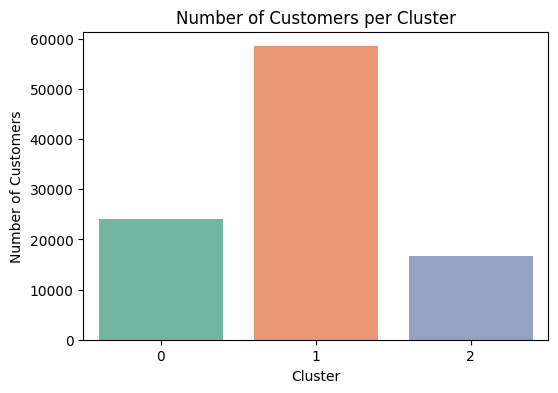

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='clusters', data=df, palette='Set2')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1388\100918529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_freq_per_cluster.index, y=purchase_freq_per_cluster.values, palette='Set2')


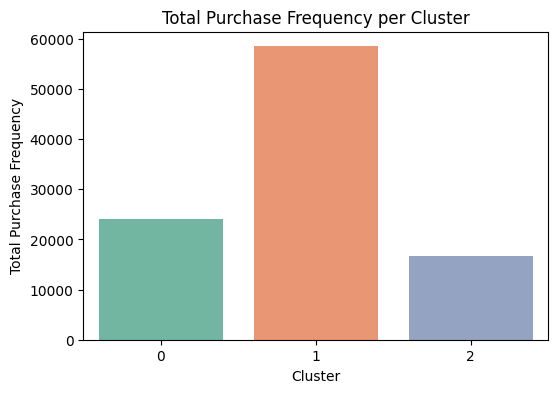

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(x=purchase_freq_per_cluster.index, y=purchase_freq_per_cluster.values, palette='Set2')
plt.title('Total Purchase Frequency per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Purchase Frequency')
plt.show()

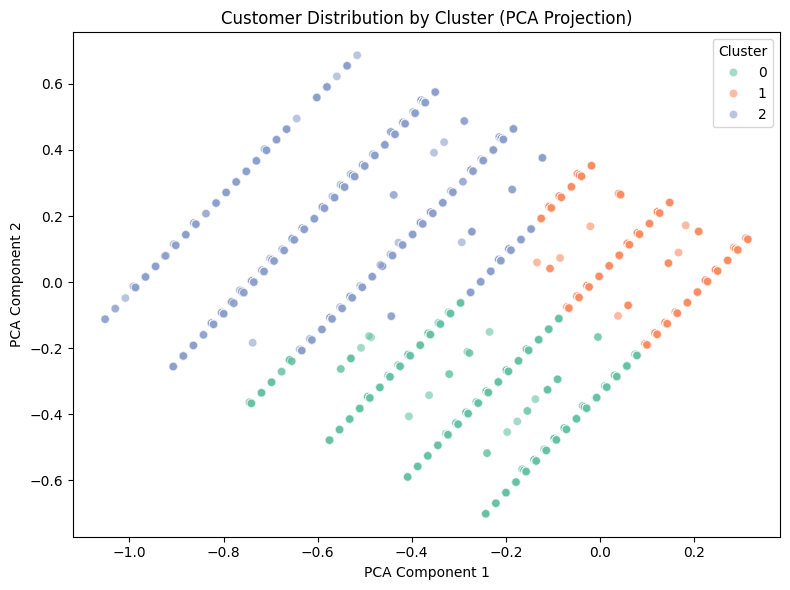

In [16]:
from sklearn.decomposition import PCA

# Visualize customer distribution across clusters using PCA for dimensionality reduction

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df2.drop(columns=['clusters']))

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_result[:,0], 
    y=pca_result[:,1], 
    hue=df2['clusters'], 
    palette='Set2', 
    alpha=0.6
)
plt.title('Customer Distribution by Cluster (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

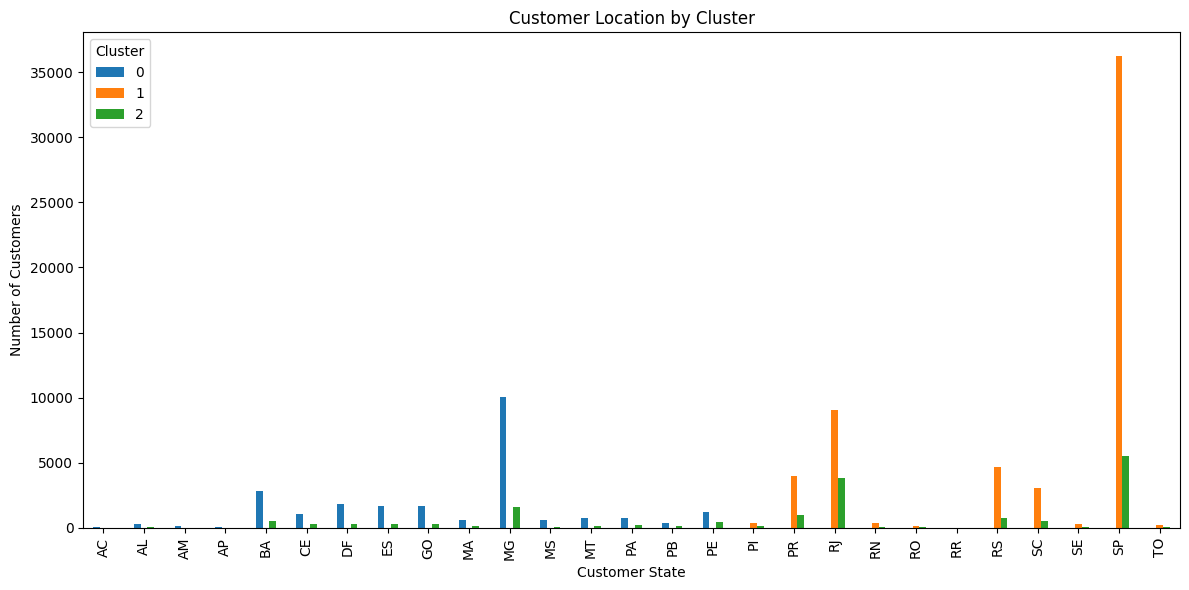

In [18]:
# Group by cluster and customer_state to get customer counts
location_counts = df.groupby(['clusters', 'customer_state']).size().reset_index(name='count')

# Pivot for grouped bar chart
location_pivot = location_counts.pivot(index='customer_state', columns='clusters', values='count').fillna(0)

# Plot grouped bar chart
location_pivot.plot(kind='bar', figsize=(12,6))
plt.title('Customer Location by Cluster')
plt.xlabel('Customer State')
plt.ylabel('Number of Customers')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, Markdown

# Create a select box for cluster selection
cluster_selector = widgets.Dropdown(
    options=sorted(df['clusters'].unique()),
    value=0,
    description='Cluster:',
    style={'description_width': 'initial'}
)

def show_cluster_kpis(cluster):
    cluster_data = df[df['clusters'] == cluster]
    total_customers = len(cluster_data)
    total_revenue = cluster_data['revenue'].sum()
    avg_order_value = cluster_data['avg_order_value'].mean()
    avg_purchase_freq = cluster_data['purchase_frequency'].mean()
    avg_review_score = cluster_data['avg_review_score'].mean()
    top_states = cluster_data['customer_state'].value_counts().head(3)
    
    display(Markdown(f"""
### KPIs for Cluster {cluster}
- **Total Customers:** {total_customers}
- **Total Revenue:** ${total_revenue:,.2f}
- **Average Order Value:** ${avg_order_value:,.2f}
- **Average Purchase Frequency:** {avg_purchase_freq:.2f}
- **Average Review Score:** {avg_review_score:.2f}
- **Top 3 States:** {', '.join([f"{state} ({count})" for state, count in top_states.items()])}
"""))

widgets.interact(show_cluster_kpis, cluster=cluster_selector)

In [19]:
df.head()

,customer_id,total_orders,avg_order_value,purchase_frequency,num_categories_bought,avg_review_score,customer_state,clusters,revenue
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,1.0,1.0,1.0,SP,2,114.74
1,000161a058600d5901f007fab4c27140,1,67.41,1.0,1.0,4.0,MG,0,67.41
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,1.0,1.0,5.0,ES,0,195.42
3,0002414f95344307404f0ace7a26f1d5,1,179.35,1.0,1.0,5.0,MG,0,179.35
4,000379cdec625522490c315e70c7a9fb,1,107.01,1.0,1.0,4.0,SP,1,107.01


In [21]:
df.to_csv('customer_segmentation_output.csv', index=False)

In [22]:
cto=pd.read_csv('customer_segmentation_output.csv')
cto.head()

,customer_id,total_orders,avg_order_value,purchase_frequency,num_categories_bought,avg_review_score,customer_state,clusters,revenue
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,1.0,1.0,1.0,SP,2,114.74
1,000161a058600d5901f007fab4c27140,1,67.41,1.0,1.0,4.0,MG,0,67.41
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,1.0,1.0,5.0,ES,0,195.42
3,0002414f95344307404f0ace7a26f1d5,1,179.35,1.0,1.0,5.0,MG,0,179.35
4,000379cdec625522490c315e70c7a9fb,1,107.01,1.0,1.0,4.0,SP,1,107.01
